In [1]:
import pandas as pd
import os

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns

### Prepare the data

In [5]:
# Load in the data from maxpreps and demo
#create a subset X which is groupby by team URL and calculates the Margin of Victiry and win percentage
#the target variables are the margin of victory and win percentage

#change the directory
os.getcwd()
os.chdir('/Users/rdhir/Documents/maxpreps-data-analysis/Data')

In [6]:
#load in the full data
full_data = pd.read_csv('final_data.csv', index_col = 0)
full_data

/var/folders/vl/lnfg4f0d5872pfxx4dys19km0000gn/T/ipykernel_15108/2135924876.py:2: DtypeWarning: Columns (38,67) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('final_data.csv', index_col = 0)


,Team 1,Team 2,Venue,Game Type,Team 1 Score,Team 2 Score,Outcome,Team 1 Address,Team 1 City,Team 1 State,Team 1 Zipcode,Team 1 URL,Team 2 URL,Team 1 Boys Sports,Team 1 Girls Sports,Team 1 SOS,Team 1 State Rank,Team 1 Rating,Team 1 Bachelor Degree,Team 1 Median Household Income,Team 1 American Indian/Alaska Native,Team 1 Asian or Asian/Pacific Islander,Team 1 Hispanic,Team 1 Black,Team 1 White,Team 1 Nat. Hawaiian or Other Pacific Isl.,Team 1 Two or More Races,Team 1 Total Students,Team 1 Grades 9-12 Students,Team 1 Free and Reduced Lunch,Team 1 Pupil/Teacher Ratio,Team 1 Charter School,Team 1 Magnet School,Team 1 Private School,Team 1 School ID,Team 1 High School,Team 1 Agency ID,Team 1 Total Expenditures per Pupil,Team 2 Address,Team 2 City,Team 2 State,Team 2 Zipcode,Team 2 Boys Sports,Team 2 Girls Sports,Team 2 SOS,Team 2 State Rank,Team 2 Rating,Team 2 Bachelor Degree,Team 2 Median Household Income,Team 2 American Indian/Alaska Native,Team 2 Asian or Asian/Pacific Islander,Team 2 Hispanic,Team 2 Black,Team 2 White,Team 2 Nat. Hawaiian or Other Pacific Isl.,Team 2 Two or More Races,Team 2 Total Students,Team 2 Grades 9-12 Students,Team 2 Free and Reduced Lunch,Team 2 Pupil/Teacher Ratio,Team 2 Charter School,Team 2 Magnet School,Team 2 Private School,Team 2 School ID,Team 2 High School,Team 2 Agency ID,Team 2 Total Expenditures per Pupil
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/2,Academy of Holy Angels,Edison,H,Regular Season,72.0,62.0,L,6600 Nicollet Ave S,Richfield,MN,55423.0,/mn/richfield/academy-of-holy-angels-stars/bas...,/mn/minneapolis/edison-tommies/basketball/21-2...,"Baseball,Basketball,Football,Ice Hockey,Lacros...","Basketball,Ice Hockey,Lacrosse,Soccer,Softball...",9.0,180,3.64,30.970122,103639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,270002503255.0,1.0,2700025.0,†,700 NE 22Nd Ave,Minneapolis,MN,55418.0,"Baseball,Basketball,Football,Lacrosse,Soccer,V...","Basketball,Lacrosse,Soccer,Softball,Tennis,Vol...",5.0,189.0,2.46,31.679176,118594.0,3.5,3.5,15.3,51.2,23.7,0.0,2.7,933.0,933.0,0.712,0.00,False,False,0.0,272124000958.0,1.0,2721240.0,22524
12/7,Academy of Holy Angels,Minneapolis Southwest,A,Regular Season,62.0,37.0,L,6600 Nicollet Ave S,Richfield,MN,55423.0,/mn/richfield/academy-of-holy-angels-stars/bas...,/mn/minneapolis/minneapolis-southwest-lakers/b...,"Baseball,Basketball,Football,Ice Hockey,Lacros...","Basketball,Ice Hockey,Lacrosse,Soccer,Softball...",9.0,180,3.64,30.970122,103639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,270002503255.0,1.0,2700025.0,†,3414 W 47Th St,Minneapolis,MN,55410.0,"Baseball,Basketball,Football,Lacrosse,Soccer,V...","Basketball,Lacrosse,Soccer,Softball,Tennis,Vol...",8.6,86.0,10.99,38.239321,179531.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,2.0,2.0,0.000,0.33,False,False,0.0,272124001948.0,1.0,2721240.0,22524
12/9,Academy of Holy Angels,Highland Park,A,Regular Season,65.0,50.0,W,6600 Nicollet Ave S,Richfield,MN,55423.0,/mn/richfield/academy-of-holy-angels-stars/bas...,/mn/st-paul/highland-park-scots/basketball/21-...,"Baseball,Basketball,Football,Ice Hockey,Lacros...","Basketball,Ice Hockey,Lacrosse,Soccer,Softball...",9.0,180,3.64,30.970122,103639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,270002503255.0,1.0,2700025.0,†,1015 Snelling Ave S,St. Paul,MN,55116.0,"Baseball,Basketball,Football,Ice Hockey,Soccer...","Basketball,Ice Hockey,Soccer,Softball,Tennis,V...",-0.3,287.0,-5.43,33.414376,126016.0,0.0,5.0,13.3,6.7,65.0,0.0,10.0,60.0,60.0,0.250,352.94,True,False,0.0,270013805534.0,1.0,2700138.0,15261
12/14,Academy of Holy Angels,Two Rivers,H,Regular Season,74.0,69.0,L,6600 Nicollet Ave S,Richfield,MN,55423.0,/mn/richfield/academy-of-holy-angels-stars/bas...,/mn/mendota-heights/two-rivers-warriors/basket...,"Baseball,Basketball,Football,Ice Hockey,Lacros...","Basketball,Ice Hockey,Lacrosse,Soccer,Softball...",9.0,180,3.64,30.970122,103639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0

In [6]:
#right now whoever wins is being reported in the home team category
full_data.loc[full_data['Outcome'] == 'L', ['Team 1 Score', 'Team 2 Score']] = full_data.loc[full_data['Outcome'] == 'L', ['Team 2 Score', 'Team 1 Score']].values
full_data[(full_data['Team 1'] == 'Bowie') & (full_data['Team 1 City'] == 'Austin')]

,Team 1,Team 2,Venue,Game Type,Team 1 Score,Team 2 Score,Outcome,Team 1 Address,Team 1 City,Team 1 State,Team 1 Zipcode,Team 1 URL,Team 2 URL,Team 1 Boys Sports,Team 1 Girls Sports,Team 1 SOS,Team 1 State Rank,Team 1 Rating,Team 2 Address,Team 2 City,Team 2 State,Team 2 Zipcode,Team 2 Boys Sports,Team 2 Girls Sports,Team 2 SOS,Team 2 State Rank,Team 2 Rating,Team 1 American Indian/Alaska Native,Team 1 Asian or Asian/Pacific Islander,Team 1 Hispanic,Team 1 Black,Team 1 White,Team 1 Nat. Hawaiian or Other Pacific Isl.,Team 1 Two or More Races,Team 1 Total Students,Team 1 Grades 9-12 Students,Team 1 Free and Reduced Lunch,Team 1 Pupil/Teacher Ratio,Team 1 Charter School,Team 1 Magnet School,Team 1 Private School,Team 1 School ID,Team 1 High School,Team 1 Agency ID,Team 1 Total Expenditures per Pupil,Team 2 American Indian/Alaska Native,Team 2 Asian or Asian/Pacific Islander,Team 2 Hispanic,Team 2 Black,Team 2 White,Team 2 Nat. Hawaiian or Other Pacific Isl.,Team 2 Two or More Races,Team 2 Total Students,Team 2 Grades 9-12 Students,Team 2 Free and Reduced Lunch,Team 2 Pupil/Teacher Ratio,Team 2 Charter School,Team 2 Magnet School,Team 2 Private School,Team 2 School ID,Team 2 High School,Team 2 Agency ID,Team 2 Total Expenditures per Pupil
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/13,Bowie,Johnson,H,Regular Season,45.0,56.0,L,4103 Slaughter Ln W,Austin,TX,78749.0,/tx/austin/bowie-bulldogs/basketball/21-22/sch...,/tx/san-antonio/johnson-jaguars/basketball/21-...,"Baseball,Basketball,Cross Country,Football,Lac...","Basketball,Cross Country,Lacrosse,Soccer,Softb...",14.7,347,12.69,23203 Bulverde Rd,San Antonio,TX,78259.0,"Baseball,Basketball,Cross Country,Football,Gol...","Basketball,Cross Country,Soccer,Softball,Swimm...",14.9,266.0,15.45,0.3,5.2,28.8,1.9,58.7,0.2,4.9,2828.0,2828.0,0.11,16.9,False,False,0.0,480894006508.0,1.0,4808940.0,26732.0,0.2,8.8,44.6,5.6,34.7,0.3,5.7,3262.0,3262.0,0.313,19.87,False,False,0.0,483294011973.0,1.0,4832940.0,11798.0
11/20,Bowie,Lockhart,A,Regular Season,50.0,36.0,W,4103 Slaughter Ln W,Austin,TX,78749.0,/tx/austin/bowie-bulldogs/basketball/21-22/sch...,/tx/lockhart/lockhart-lions/basketball/21-22/s...,"Baseball,Basketball,Cross Country,Football,Lac...","Basketball,Cross Country,Lacrosse,Soccer,Softb...",14.7,347,12.69,1 Lion Country Dr.,Lockhart,TX,78644.0,"Baseball,Basketball,Cross Country,Football,Gol...","Basketball,Golf,Soccer,Softball,Track & Field,...",2.7,796.0,1.50,0.3,5.2,28.8,1.9,58.7,0.2,4.9,2828.0,2828.0,0.11,16.9,False,False,0.0,480894006508.0,1.0,4808940.0,26732.0,0.5,0.5,77.9,3.0,17.0,0.1,0.9,1862.0,1862.0,0.731,15.35,False,False,0.0,482787003123.0,1.0,4827870.0,11095.0
11/22,Bowie,McNeil,H,Regular Season,46.0,33.0,W,4103 Slaughter Ln W,Austin,TX,78749.0,/tx/austin/bowie-bulldogs/basketball/21-22/sch...,/tx/austin/mcneil-mavericks/basketball/21-22/s...,"Baseball,Basketball,Cross Country,Football,Lac...","Basketball,Cross Country,Lacrosse,Soccer,Softb...",14.7,347,12.69,5720 Mcneil Dr,Austin,TX,78729.0,"Baseball,Basketball,Football,Golf,Lacrosse,Soc...","Basketball,Lacrosse,Soccer,Softball,Tennis,Vol...",16.7,609.0,5.56,0.3,5.2,28.8,1.9,58.7,0.2,4.9,2828.0,2828.0,0.11,16.9,False,False,0.0,480894006508.0,1.0,4808940.0,26732.0,0.3,22.9,24.8,10.8,36.3,0.0,4.8,2484.0,2484.0,0.212,14.28,False,False,0.0,483808006469.0,1.0,4838080.0,15114.0
12/2,Bowie,Round Rock,H,Regular Season,49.0,41.0,W,4103 Slaughter Ln W,Austin,TX,78749.0,/tx/austin/bowie-bulldogs/basketball/21-22/sch...,/tx/round-rock/round-rock-homeschool-raiders/b...,"Baseball,Basketball,Cross Country,Football,Lac...","Basketball,Cross Country,Lacrosse,Soccer,Softb...",14.7,347,12.69,1700 Deer Chase Cove,Round Rock,TX,78681.0,"Baseball,Basketball,Soccer","Basketball,Soccer,Softball,Volleyball",11.5,257.0,15.74,0.3,5.2,28.8,1.9,58.7,0.2,4.9,2828.0,2828.0,0.11,16.9,False,False,0.0,480894006508.0,1.0,4808940.0,26732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/2,Bowie,Universit

In [6]:
full_data.columns

Index(['Team 1', 'Team 2', 'Venue', 'Game Type', 'Team 1 Score',
       'Team 2 Score', 'Outcome', 'Team 1 Address', 'Team 1 City',
       'Team 1 State', 'Team 1 Zipcode', 'Team 1 URL', 'Team 2 URL',
       'Team 1 Boys Sports', 'Team 1 Girls Sports', 'Team 1 SOS',
       'Team 1 State Rank', 'Team 1 Rating', 'Team 1 Bachelor Degree',
       'Team 2 Address', 'Team 2 City', 'Team 2 State', 'Team 2 Zipcode',
       'Team 2 Boys Sports', 'Team 2 Girls Sports', 'Team 2 SOS',
       'Team 2 State Rank', 'Team 2 Rating', 'Team 2 Bachelor Degree',
       'Team 1 American Indian/Alaska Native',
       'Team 1 Asian or Asian/Pacific Islander', 'Team 1 Hispanic',
       'Team 1 Black', 'Team 1 White',
       'Team 1 Nat. Hawaiian or Other Pacific Isl.',
       'Team 1 Two or More Races', 'Team 1 Total Students',
       'Team 1 Grades 9-12 Students', 'Team 1 Free and Reduced Lunch',
       'Team 1 Pupil/Teacher Ratio', 'Team 1 Charter School',
       'Team 1 Magnet School', 'Team 1 Private Scho

In [7]:
#make a new column that calculates the margin of victory
full_data['MV'] = full_data['Team 1 Score'] - full_data['Team 2 Score']

#make a new column that calculates the win percentage
full_data['MV avg'] = full_data.groupby('Team 1 URL')['MV'].transform('mean')


In [8]:
#make another column that is total games
full_data['Total Games'] = full_data.groupby('Team 1 URL')['Team 1 URL'].transform('count')

#this calculates the win percentage for each team
full_data['Win Percentage'] = full_data.groupby('Team 1 URL')['Outcome'].transform(lambda x: x[x == 'W'].count() / x.count())


In [9]:
full_data.columns
cols = ['Team 1', 'Team 1 URL', 'Team 1 SOS',
       'Team 1 State Rank', 'Team 1 Rating', 'Team 1 American Indian/Alaska Native',
       'Team 1 Asian or Asian/Pacific Islander', 'Team 1 Hispanic',
       'Team 1 Black', 'Team 1 White',
       'Team 1 Nat. Hawaiian or Other Pacific Isl.',
       'Team 1 Two or More Races', 'Team 1 Total Students',
       'Team 1 Grades 9-12 Students', 'Team 1 Free and Reduced Lunch',
       'Team 1 Pupil/Teacher Ratio', 'Team 1 Charter School',
       'Team 1 Magnet School', 'Team 1 Private School',
       'Team 1 Total Expenditures per Pupil',
       'MV avg','Win Percentage']
df = full_data[cols].drop_duplicates(subset=['Team 1 URL'])

In [10]:
# Replace '†' with NaN
import numpy as np
df.replace('†', np.nan, inplace=True)

In [11]:
df.to_csv('final_data_target.csv')

### XGBoost Model

In [12]:
#import the correct packages
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [16]:
#create features and target columns
df.columns
features = ['Team 1 SOS', 'Team 1 State Rank',
       'Team 1 Rating', 'Team 1 American Indian/Alaska Native',
       'Team 1 Asian or Asian/Pacific Islander', 'Team 1 Hispanic',
       'Team 1 Black', 'Team 1 White',
       'Team 1 Nat. Hawaiian or Other Pacific Isl.',
       'Team 1 Two or More Races', 'Team 1 Total Students',
       'Team 1 Grades 9-12 Students', 'Team 1 Free and Reduced Lunch',
       'Team 1 Pupil/Teacher Ratio', 'Team 1 Charter School',
       'Team 1 Magnet School', 'Team 1 Private School',
       'Team 1 Total Expenditures per Pupil']
target1 = df['MV avg']
target2 = df['Win Percentage']
X = df[features]

In [17]:
df[df['Team 1 Private School'] == 1]

,Team 1,Team 1 URL,Team 1 SOS,Team 1 State Rank,Team 1 Rating,Team 1 American Indian/Alaska Native,Team 1 Asian or Asian/Pacific Islander,Team 1 Hispanic,Team 1 Black,Team 1 White,Team 1 Nat. Hawaiian or Other Pacific Isl.,Team 1 Two or More Races,Team 1 Total Students,Team 1 Grades 9-12 Students,Team 1 Free and Reduced Lunch,Team 1 Pupil/Teacher Ratio,Team 1 Charter School,Team 1 Magnet School,Team 1 Private School,Team 1 Total Expenditures per Pupil,MV avg,Win Percentage
Date,,,,,,,,,,,,,,,,,,,,,,
12/2,Breck,/mn/minneapolis/breck-mustangs/basketball/21-2...,3.8,224,-0.30,1.2,6.7,3.4,8.8,68.7,0.0,11.1,1120.0,484.0,NaN,11.46,True,True,1.0,NaN,0.000000,0.384615
12/2,Cotter,/mn/winona/cotter-ramblers/basketball/21-22/sc...,3.0,302,-6.36,0.3,11.7,2.7,0.5,79.5,0.0,5.3,376.0,245.0,NaN,14.52,True,True,1.0,NaN,-16.000000,0.250000
12/3,DeLaSalle,/mn/minneapolis/delasalle-islanders/basketball...,12.0,12,22.86,0.7,5.0,14.2,18.0,45.2,0.8,16.2,728.0,728.0,NaN,16.74,True,True,1.0,NaN,17.266667,0.766667
11/30,First Baptist,/mn/rosemount/first-baptist-crusaders/basketba...,-7.2,235,-1.18,0.0,7.1,11.6,20.2,57.1,0.0,4.0,233.0,57.0,NaN,10.00,True,True,1.0,NaN,11.185185,0.666667
12/3,Fourth Baptist Christian,/mn/plymouth/fourth-baptist-christian-warriors...,-9.1,354,-12.13,0.0,6.6,4.0,6.6,74.5,0.0,8.4,299.0,77.0,NaN,14.86,True,True,1.0,NaN,-9.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/9,Loyola-Sacred Heart,/mt/missoula/loyola-sacred-heart-rams/basketba...,0.3,73,2.24,2.3,3.0,1.8,0.7,87.0,0.7,4.6,468.0,159.0,NaN,8.46,True,True,1.0,NaN,4.952381,0.523810
12/3,Lustre Christian,/mt/frazer/lustre-christian-lions/basketball/2...,-4.3,23,12.24,8.7,4.4,4.4,13.0,65.2,4.4,0.0,23.0,23.0,NaN,4.60,True,True,1.0,NaN,25.631579,0.894737
12/10,St. Labre Indian Catholic,/mt/ashland/st-labre-indian-catholic-braves/ba...,3.4,138,-14.10,93.9,0.0,0.0,0.0,6.1,0.0,0.0,148.0,148.0,NaN,8.22,True,True,1.0,NaN,-23.857143,0.142857


In [66]:
import numpy as np

In [75]:
#split data into test and train splits
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X, target1, test_size=0.2, random_state=42)

In [76]:
#create the model objest
model = xgb.XGBRegressor(objective='reg:squarederror')

In [77]:
#hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


In [78]:
#fit the model
grid_search.fit(X_train_mv, y_train_mv)

print("Best hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [80]:
# Predict on the test set
y_pred = best_model.predict(X_test_mv)

# Evaluate the model
mse = mean_squared_error(y_test_mv, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 16.009527037472257


Matplotlib is building the font cache; this may take a moment.


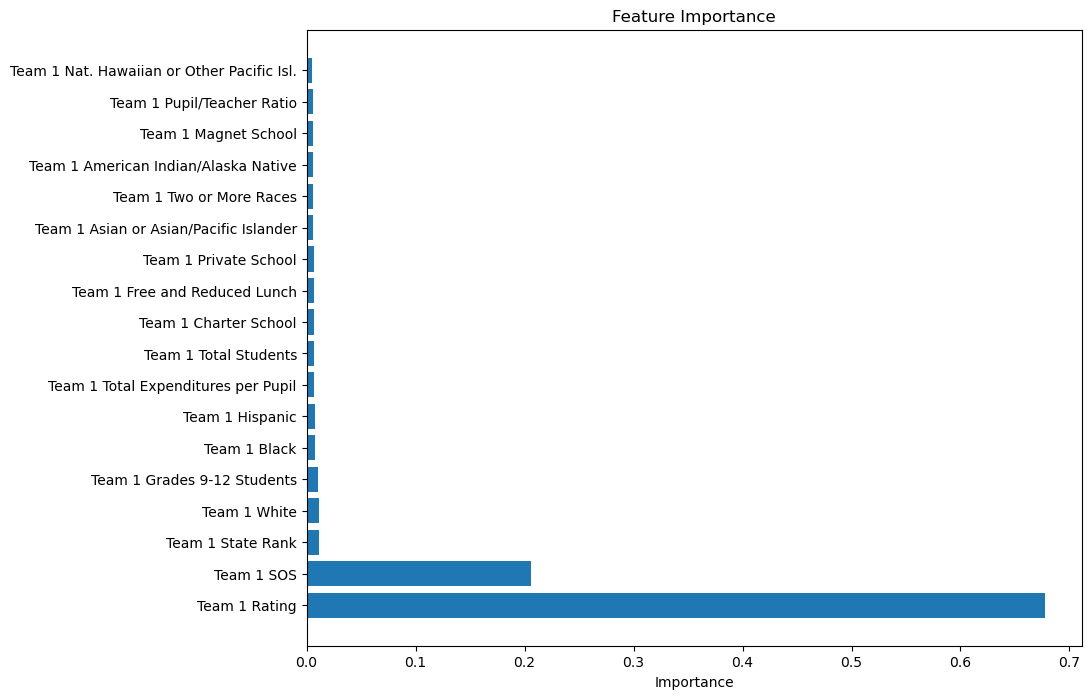

In [83]:
import matplotlib.pyplot as plt

# Get feature importance
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### Repeat XGBoost Model without ranking attributes

In [95]:
#create features and target columns
df.columns
features = ['Team 1 American Indian/Alaska Native',
       'Team 1 Asian or Asian/Pacific Islander', 'Team 1 Hispanic',
       'Team 1 Black', 'Team 1 White',
       'Team 1 Nat. Hawaiian or Other Pacific Isl.',
       'Team 1 Two or More Races', 'Team 1 Total Students',
       'Team 1 Grades 9-12 Students', 'Team 1 Free and Reduced Lunch',
       'Team 1 Pupil/Teacher Ratio', 'Team 1 Charter School',
       'Team 1 Magnet School', 'Team 1 Private School',
       'Team 1 Total Expenditures per Pupil']
target1 = df['MV avg']
target2 = df['Win Percentage']
X2 = df[features]
X2 = X2.astype(float)

In [96]:
#split data into test and train splits
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X2, target1, test_size=0.2, random_state=42)

In [97]:
#create the model objest
model = xgb.XGBRegressor(objective='reg:squarederror')

In [98]:
#hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200], # try 10, 20 , 50
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


In [99]:
#fit the model
grid_search.fit(X_train_mv, y_train_mv)

print("Best hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_mv)

# Evaluate the model
mse = mean_squared_error(y_test_mv, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error: 155.65171369599562


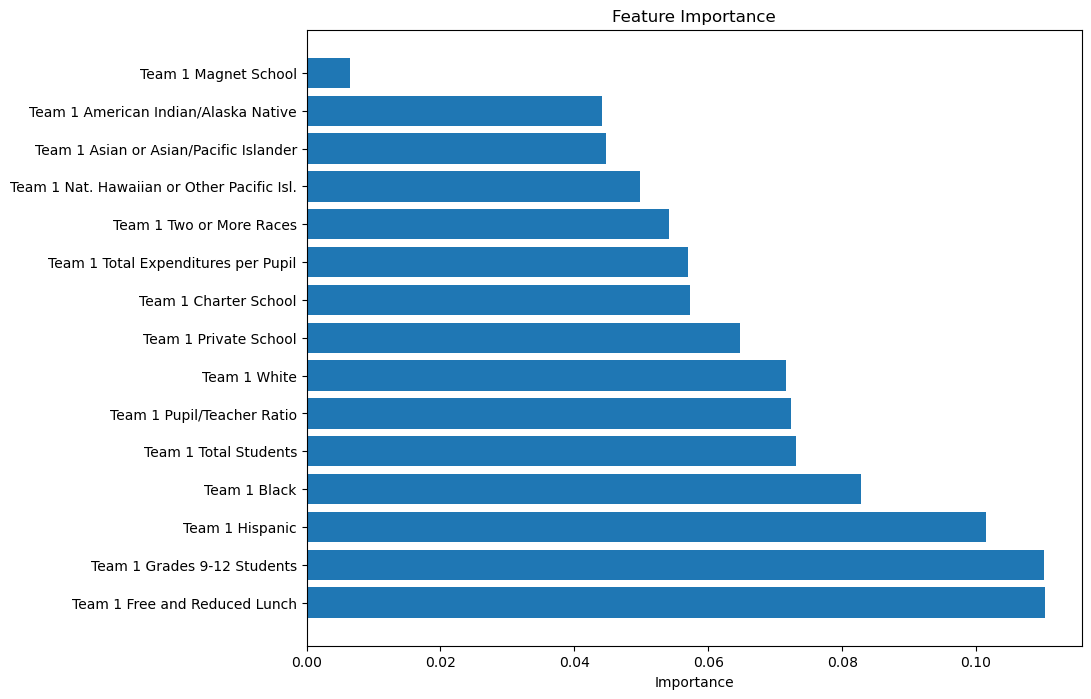

In [100]:

import matplotlib.pyplot as plt

# Get feature importance
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

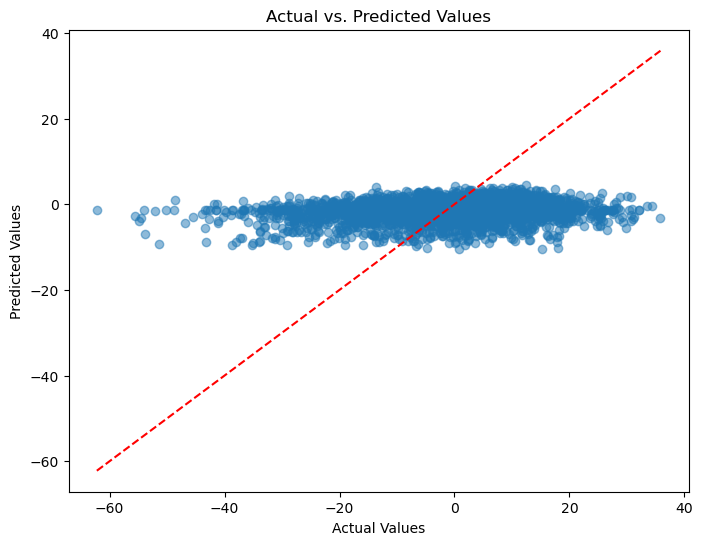

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_mv, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test_mv), max(y_test_mv)], [min(y_test_mv), max(y_test_mv)], color='red', linestyle='--')  # Add a reference line
plt.show()


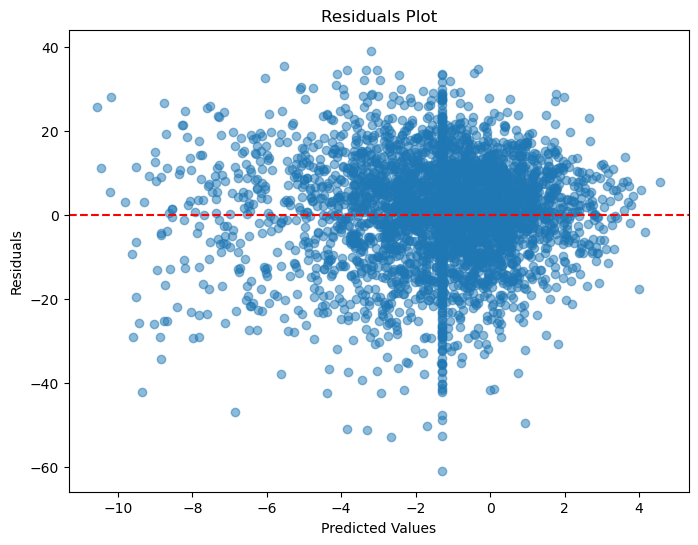

In [104]:
residuals = y_test_mv - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [105]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_mv, y_pred)
print(f'R-squared Score: {r2}')


R-squared Score: 0.03006324516136072


### Linear Regression Model

In [ ]:
#split data into test and train splits
